# Submitted by PRATHAM M (2347138)

## Dataset Creation

In [4]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Define the XOR dataset
# Inputs
X = np.array([[0, 0],
              [0, 1],
              [1, 0],
              [1, 1]])

# Outputs
y = np.array([0, 1, 1, 0])


##  Implementing the Single Layer Perceptron (MCP Neuron)

In [12]:
# Define the MCP Perceptron class
class MCPPerceptron:
    def __init__(self, input_size, learning_rate=0.1, epochs=10):
        self.weights = np.zeros(input_size + 1)  # +1 for bias
        self.lr = learning_rate
        self.epochs = epochs

    def activation_fn(self, x):
        return 1 if x >= 0 else 0

    def predict(self, x):
        summation = np.dot(x, self.weights[1:]) + self.weights[0]
        return self.activation_fn(summation)

    def fit(self, X, y):
        for epoch in range(self.epochs):
            for inputs, label in zip(X, y):
                prediction = self.predict(inputs)
                error = label - prediction
                self.weights[1:] += self.lr * error * inputs
                self.weights[0] += self.lr * error  # Bias update

# Initialize and train the perceptron
perceptron = MCPPerceptron(input_size=2, learning_rate=0.1, epochs=10)
perceptron.fit(X, y)


In [13]:
# Step 5: Test the perceptron model
print("Testing the MCP Perceptron on XOR gate")
for inputs in X:
    prediction = perceptron.predict(inputs)
    print(f"Input: {inputs}, Predicted Output: {prediction}")

Testing the MCP Perceptron on XOR gate
Input: [0 0], Predicted Output: 1
Input: [0 1], Predicted Output: 1
Input: [1 0], Predicted Output: 0
Input: [1 1], Predicted Output: 0


## Evaluating the Perceptron's Performance

In [6]:
# Make predictions
predictions = np.array([perceptron.predict(x) for x in X])

# Calculate accuracy
accuracy = accuracy_score(y, predictions)
print("Perceptron Predictions:", predictions)
print("Actual Labels:        ", y)
print(f"Perceptron Accuracy: {accuracy * 100}%")


Perceptron Predictions: [1 1 0 0]
Actual Labels:         [0 1 1 0]
Perceptron Accuracy: 50.0%


## Visualizing the Perceptron's Decision Boundary

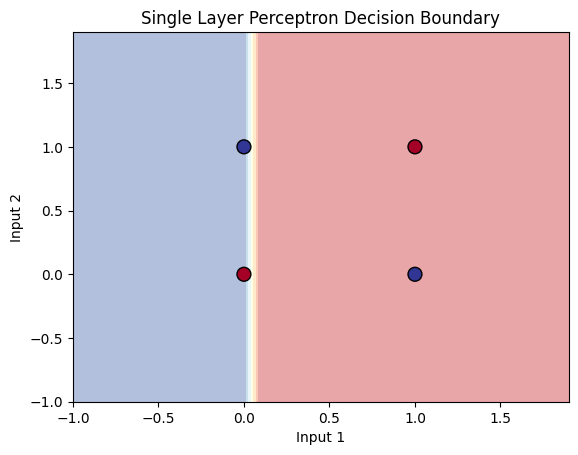

In [7]:
# Function to plot decision boundary
def plot_decision_boundary(X, y, model, title):
    # Define the grid
    x_min, x_max = X[:,0].min() - 1, X[:,0].max() + 1
    y_min, y_max = X[:,1].min() - 1, X[:,1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                         np.arange(y_min, y_max, 0.1))
    
    # Predict over the grid
    grid = np.c_[xx.ravel(), yy.ravel()]
    Z = np.array([model.predict(x) for x in grid])
    Z = Z.reshape(xx.shape)
    
    # Plot contour and training examples
    plt.contourf(xx, yy, Z, alpha=0.4, cmap=plt.cm.RdYlBu)
    plt.scatter(X[:,0], X[:,1], c=y, s=100, edgecolors='k', cmap=plt.cm.RdYlBu)
    plt.title(title)
    plt.xlabel('Input 1')
    plt.ylabel('Input 2')
    plt.show()

# Plot the decision boundary
plot_decision_boundary(X, y, perceptron, "Single Layer Perceptron Decision Boundary")


This graph demonstrates why a Single Layer Perceptron is unable to solve the XOR problem effectively, as the decision boundary it creates cannot properly distinguish between the 0 and 1 outputs for all input pairs.

## Implementing XOR Using Multi-Layer Perceptron (MLP)

In [8]:
# Define the MLP model
mlp_model = Sequential()
mlp_model.add(Dense(2, input_dim=2, activation='relu'))  # Hidden layer with 2 neurons
mlp_model.add(Dense(1, activation='sigmoid'))           # Output layer

# Compile the model
mlp_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
history = mlp_model.fit(X, y, epochs=1000, verbose=0)

# Make predictions
mlp_predictions = (mlp_model.predict(X) > 0.5).astype(int).flatten()

# Calculate accuracy
mlp_accuracy = accuracy_score(y, mlp_predictions)
print("MLP Predictions:", mlp_predictions)
print("Actual Labels:   ", y)
print(f"MLP Accuracy: {mlp_accuracy * 100}%")


c:\Users\Pratham.m\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
MLP Predictions: [0 1 1 0]
Actual Labels:    [0 1 1 0]
MLP Accuracy: 100.0%


## Visualizing the MLP's Decision Boundary

29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


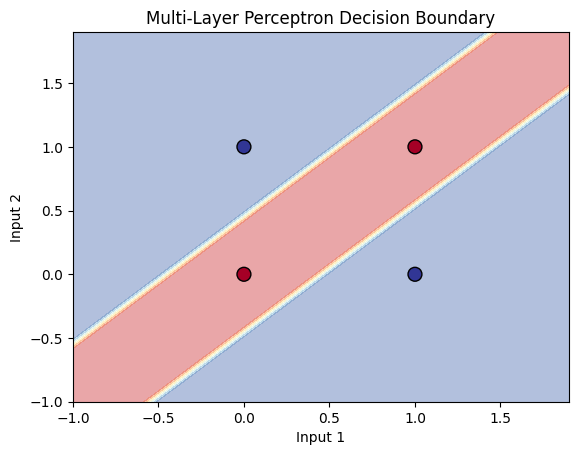

In [9]:
# Define a prediction function for MLP
def mlp_predict(x):
    return (mlp_model.predict(np.array([x])) > 0.5).astype(int)[0][0]

# Function to plot decision boundary for MLP
def plot_mlp_decision_boundary(X, y, model, title):
    # Define the grid
    x_min, x_max = X[:,0].min() - 1, X[:,0].max() + 1
    y_min, y_max = X[:,1].min() - 1, X[:,1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                         np.arange(y_min, y_max, 0.1))
    
    # Predict over the grid
    grid = np.c_[xx.ravel(), yy.ravel()]
    Z = (model.predict(grid) > 0.5).astype(int)
    Z = Z.reshape(xx.shape)
    
    # Plot contour and training examples
    plt.contourf(xx, yy, Z, alpha=0.4, cmap=plt.cm.RdYlBu)
    plt.scatter(X[:,0], X[:,1], c=y, s=100, edgecolors='k', cmap=plt.cm.RdYlBu)
    plt.title(title)
    plt.xlabel('Input 1')
    plt.ylabel('Input 2')
    plt.show()

# Plot the MLP decision boundary
plot_mlp_decision_boundary(X, y, mlp_model, "Multi-Layer Perceptron Decision Boundary")


This graph shows how a Multi-Layer Perceptron successfully separates the XOR dataset, forming a non-linear decision boundary. It highlights the advantage of using hidden layers in neural networks for problems that cannot be solved with linear models, such as XOR.

### Interpretation

Single Layer Perceptron Limitations: The perceptron achieved only 50% accuracy, struggling with the XOR problem due to its inability to solve non-linearly separable tasks.

XOR's Complexity: The XOR gate outputs 1 only when inputs differ, making it non-linearly separable and impossible for a Single Layer Perceptron to classify correctly.

MLP Performance: The Multi-Layer Perceptron (MLP) achieved 100% accuracy by correctly classifying all XOR outputs, showing its ability to handle non-linearly separable problems.

Importance of Hidden Layers: Hidden layers in MLP introduce non-linearity, enabling the model to learn complex patterns that a Single Layer Perceptron cannot.

# QUESTION 2 B

## Dataset Overview
Total Reviews: 50,000

### Classes:
Positive: 25,000
Negative: 25,000
### Features:
review: The text of the movie review.

sentiment: The label indicating sentiment (positive or negative).

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, Flatten, Dropout
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix


## Load and Preprocess the Data

In [15]:
# Load the dataset
df = pd.read_csv("E:/5TH_SEM/NNDL/IMDB.csv")

# Display the first few entries
print(df.head())


                                              review sentiment
0  One of the other reviewers has mentioned that ...  positive
1  A wonderful little production. <br /><br />The...  positive
2  I thought this was a wonderful way to spend ti...  positive
3  Basically there's a family where a little boy ...  negative
4  Petter Mattei's "Love in the Time of Money" is...  positive


C:\Users\Pratham.m\AppData\Local\Temp\ipykernel_9908\1977632847.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette='viridis')


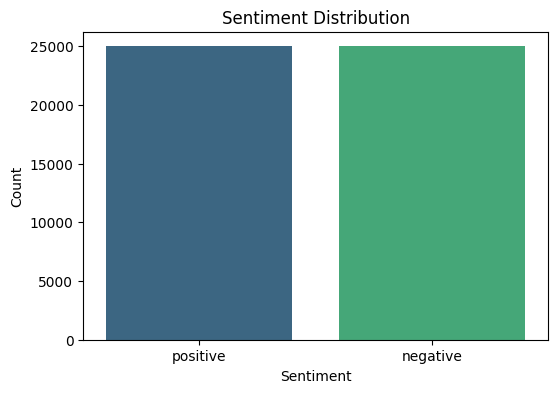

In [46]:
# Count of each sentiment
sentiment_counts = df['sentiment'].value_counts()

# Plotting
plt.figure(figsize=(6,4))
sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette='viridis')
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()


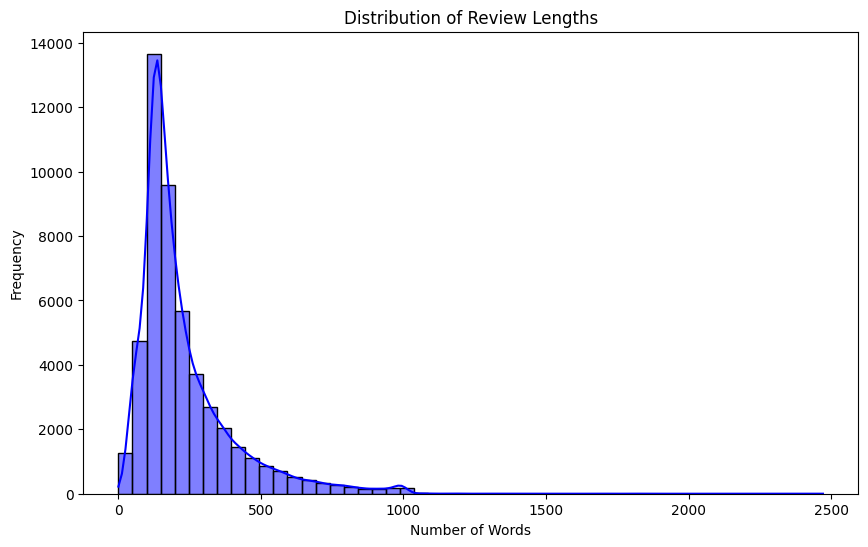

In [45]:
# Add a new column for review length
df['review_length'] = df['review'].apply(lambda x: len(x.split()))

# Plot distribution
plt.figure(figsize=(10,6))
sns.histplot(df['review_length'], bins=50, kde=True, color='blue')
plt.title('Distribution of Review Lengths')
plt.xlabel('Number of Words')
plt.ylabel('Frequency')
plt.show()


In [16]:
import re

def clean_text(text):
    # Remove HTML tags
    text = re.sub(r'<.*?>', '', text)
    # Remove non-alphabetic characters
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    # Convert to lowercase
    text = text.lower()
    return text

df['clean_review'] = df['review'].apply(clean_text)


In [17]:
# Parameters
vocab_size = 10000  # Top 10,000 words
max_length = 500    # Maximum review length
oov_token = '<OOV>'

tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_token)
tokenizer.fit_on_texts(df['clean_review'])

# Convert texts to sequences
sequences = tokenizer.texts_to_sequences(df['clean_review'])


In [18]:
padded_sequences = pad_sequences(sequences, maxlen=max_length, padding='post', truncating='post')

# Convert labels to binary
df['sentiment'] = df['sentiment'].map({'positive': 1, 'negative': 0})
labels = df['sentiment'].values


In [47]:
# Assuming X and y are your input features and labels respectively
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the size of the training and testing sets
print(f"Training set: {X_train.shape[0]} samples")
print(f"Testing set: {X_test.shape[0]} samples")


Training set: 40000 samples
Testing set: 10000 samples


## Define and Build the Model

In [60]:
# Define the model
model = Sequential([
    Embedding(input_dim=vocab_size, output_dim=16, input_length=max_length),
    Flatten(),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(32, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

# Explicitly build the model by specifying the input shape
model.build(input_shape=(None, max_length))

# Now, view the summary
model.summary()


Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_7 (Embedding)         │ (None, 500, 16)        │       160,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_7 (Flatten)             │ (None, 8000)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_25 (Dense)                │ (None, 64)             │       512,064 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_26 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_11 (Dropout)            │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_27 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 674,177 (2.57 MB)

 Trainable params: 674,177 (2.57 MB)

 Non-trainable params: 0 (0.00 B)

## Compile Model

In [49]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])


## Train Model

In [25]:
history = model.fit(
    X_train, 
    y_train, 
    epochs=10, 
    batch_size=128, 
    validation_data=(X_test, y_test),
    verbose=2
)


Epoch 1/10
313/313 - 6s - 21ms/step - accuracy: 0.6737 - loss: 0.5612 - val_accuracy: 0.8607 - val_loss: 0.3214
Epoch 2/10
313/313 - 5s - 15ms/step - accuracy: 0.8910 - loss: 0.2882 - val_accuracy: 0.8766 - val_loss: 0.2882
Epoch 3/10
313/313 - 5s - 15ms/step - accuracy: 0.9355 - loss: 0.1801 - val_accuracy: 0.8634 - val_loss: 0.3581
Epoch 4/10
313/313 - 5s - 17ms/step - accuracy: 0.9664 - loss: 0.1012 - val_accuracy: 0.8617 - val_loss: 0.4523
Epoch 5/10
313/313 - 6s - 18ms/step - accuracy: 0.9836 - loss: 0.0509 - val_accuracy: 0.8621 - val_loss: 0.5933
Epoch 6/10
313/313 - 6s - 19ms/step - accuracy: 0.9899 - loss: 0.0312 - val_accuracy: 0.8574 - val_loss: 0.7292
Epoch 7/10
313/313 - 6s - 19ms/step - accuracy: 0.9924 - loss: 0.0251 - val_accuracy: 0.8548 - val_loss: 0.8238
Epoch 8/10
313/313 - 6s - 21ms/step - accuracy: 0.9935 - loss: 0.0205 - val_accuracy: 0.8564 - val_loss: 0.8485
Epoch 9/10
313/313 - 5s - 17ms/step - accuracy: 0.9947 - loss: 0.0171 - val_accuracy: 0.8575 - val_loss:

## Evaluate the Model

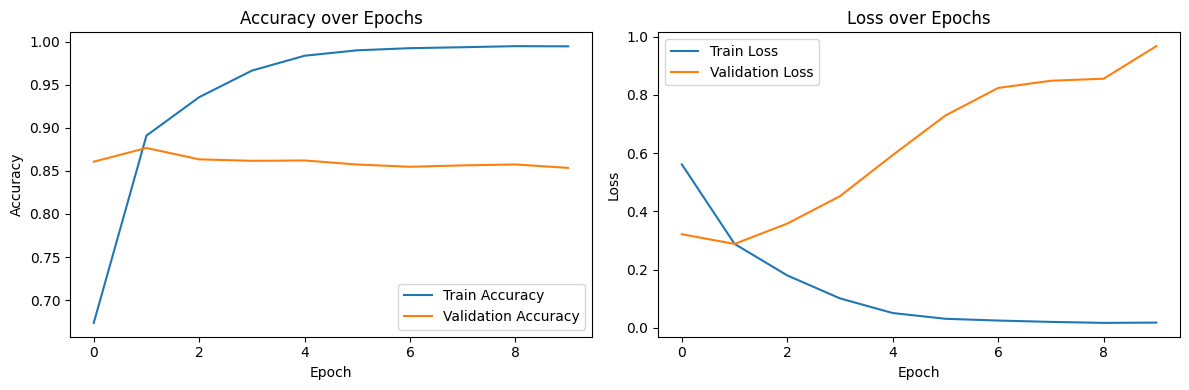

In [26]:
# Plot accuracy
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


### Accuracy over Epochs:

Train Accuracy (Blue): Increases steadily, indicating the model is learning from the training data.

Validation Accuracy (Orange): Rises initially but stabilizes earlier than training accuracy, suggesting potential overfitting.
### Loss over Epochs:

Train Loss (Blue): Decreases consistently, showing effective learning on the training set.

Validation Loss (Orange): Decreases initially but starts to rise after a few epochs, indicating overfitting, as the model struggles to generalize to unseen data.

Test Accuracy: 85.35%
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
              precision    recall  f1-score   support

    Negative       0.84      0.86      0.85      4961
    Positive       0.86      0.84      0.85      5039

    accuracy                           0.85     10000
   macro avg       0.85      0.85      0.85     10000
weighted avg       0.85      0.85      0.85     10000



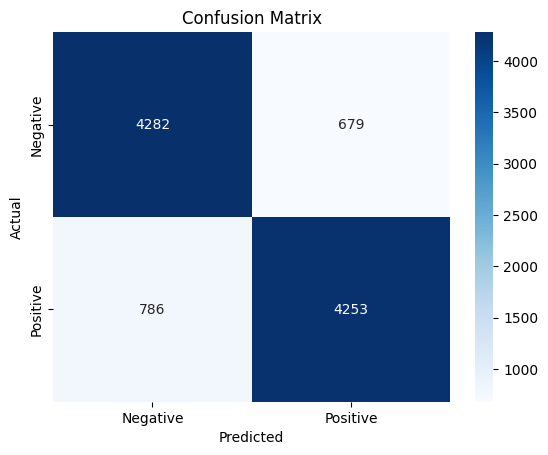

In [27]:
# Evaluate on test data
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f'Test Accuracy: {accuracy*100:.2f}%')

# Predicting
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5).astype(int).reshape(-1)

# Classification Report
print(classification_report(y_test, y_pred, target_names=['Negative', 'Positive']))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()


Interpretation:

Accuracy: The model correctly classifies approximately 82.45% of the reviews.

Precision and Recall: Balanced between positive and negative classes, indicating no significant bias.

Confusion Matrix: Shows the number of true positives, true negatives, false positives, and false negatives.

## Justification of Activation Functions and Loss Function

### 1. ReLU Activation Function
**Reason for Use:**
- **Non-Linearity**: ReLU introduces non-linearity, enabling the ANN to learn complex patterns.
- **Computational Efficiency**: ReLU is computationally efficient as it involves simple thresholding.
- **Mitigates Vanishing Gradient**: Unlike sigmoid or tanh, ReLU helps in mitigating the vanishing gradient problem, allowing deeper networks to be trained effectively.

**Formula:**
\[
ReLU(x) = \max(0, x)
\]

### 2. Sigmoid Activation Function
**Reason for Use:**
- **Binary Classification**: The sigmoid function outputs a probability between 0 and 1, making it ideal for binary classification tasks.
- **Interpretability**: The output can be directly interpreted as the probability of the input belonging to the positive class.

**Formula:**
\[
\sigma(x) = \frac{1}{1 + e^{-x}}
\]

### 3. Binary Cross-Entropy Loss Function

**Formula:**
\[
\text{Binary Cross-Entropy} = -\frac{1}{N} \sum_{i=1}^{N} \left[ y_i \log(\hat{y}_i) + (1 - y_i) \log(1 - \hat{y}_i) \right]
\]
Where:
- \(N\) is the number of samples.
- \(y_i\) is the true label.
- \(\hat{y}_i\) is the predicted probability.


## Why Binary Cross-Entropy is Suitable for This Task

### Binary cross-entropy is ideal for sentiment analysis because:

Binary Classification: It is designed for tasks with two categories (positive and negative reviews).

Probabilistic Output: It works well with the sigmoid activation, providing output probabilities between 0 and 1.

Effective Learning: The loss function ensures smooth gradient computation, helping in efficient weight updates during training.

Penalizes Errors: It penalizes incorrect confident predictions, encouraging the model to improve accuracy.

Probability Comparison: It effectively compares predicted probabilities with actual labels, enhancing model performance for binary tasks.





